In [1]:
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import util
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Projet

K_means

In [2]:
def type_img(image):
    #jpg
    if (len(image.shape)==3):
        return 3
    #pgm
    elif (len(image.shape)==2):
        return 2
    #png
    elif(len(image.shape)==4):
        return 4
    else:
        return "erreur"

def algo(pixel, nb_clusters):
    max_iterations = 50
    #centre aleatoire
    centres = pixel[np.random.choice(pixel.shape[0], nb_clusters, replace=False)]
    #calcule distance
    for _ in range(max_iterations):
        distances = []
        for centre in centres:
            distance = []
            for pix in pixel:
                dist = np.linalg.norm(pix - centre)
                distance.append(dist)
            distances.append(distance)
        
        distances = np.array(distances)

        #met chaque pixel avec un cluster
        labels = np.argmin(distances, axis=0)

        #met a jours les centres
        for i in range(nb_clusters):
            cluster_points = pixel[labels == i]
            if len(cluster_points) > 0:
                centres[i] = np.mean(cluster_points, axis=0)

    #met a chaque pixel la valeur du centre
    for i in range(nb_clusters):
        pixel[labels == i] = centres[i]
    
    return pixel

def k_means(image, nb_clusters):
    itype = type_img(image)
    #operation selon le type
    if (itype == 3):
        h, w, truc = image.shape
        pixel = image.reshape((h * w, truc))
    elif (itype == 2):
        h, w = image.shape
        pixel = image.reshape((h * w, 1))
    else:
        return False

    #fait l'algo
    pixel = algo(pixel, nb_clusters)

    #recrée l'image selon le type
    if (itype == 3):
        image2 = pixel.reshape((h, w, truc))
    elif (itype == 2):
        image2 = pixel.reshape((h, w))

    return image2

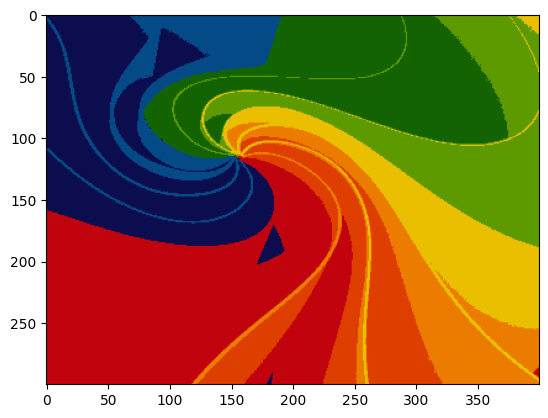

In [17]:
PetiteBete = io.imread('Image/feuilles.jpg')
PetiteBete = util.img_as_float(PetiteBete)
plt.imshow(k_means(PetiteBete, 8),cmap='gray')
plt.show()

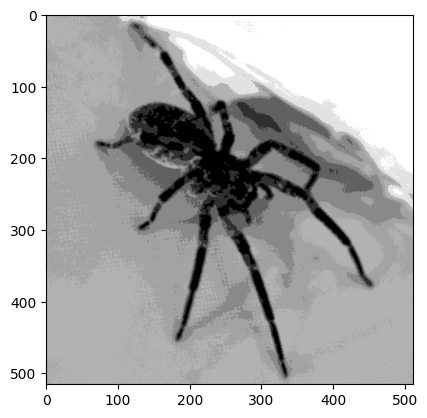

In [3]:
test = io.imread('Image/PetiteBete.pgm')
test = util.img_as_float(test)

plt.imshow(k_means(test,8),cmap='gray')
plt.show()

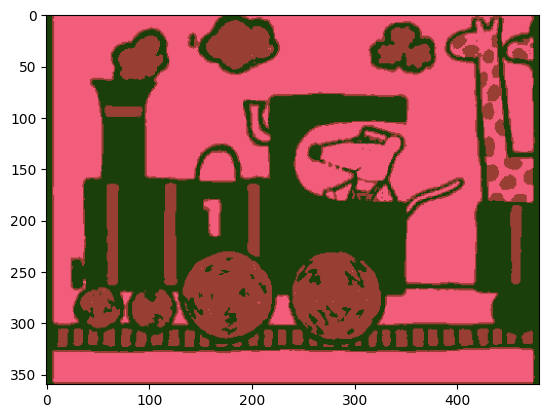

In [7]:
PetiteBete = io.imread('Image/mimi1.jpg')
PetiteBete = util.img_as_float(PetiteBete)
plt.imshow(k_means(PetiteBete, 3),cmap='gray')
plt.show()

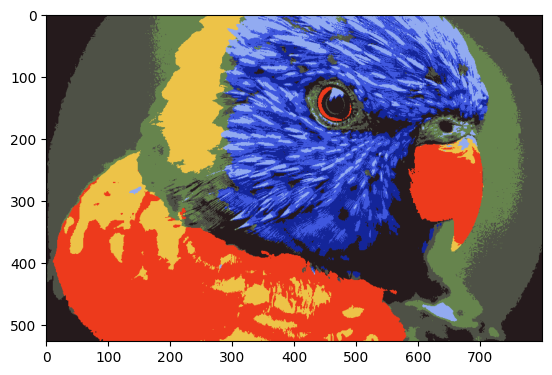

In [8]:
PetiteBete = io.imread('Image/perr.jpg')
PetiteBete = util.img_as_float(PetiteBete)
plt.imshow(k_means(PetiteBete, 8),cmap='gray')
plt.show()

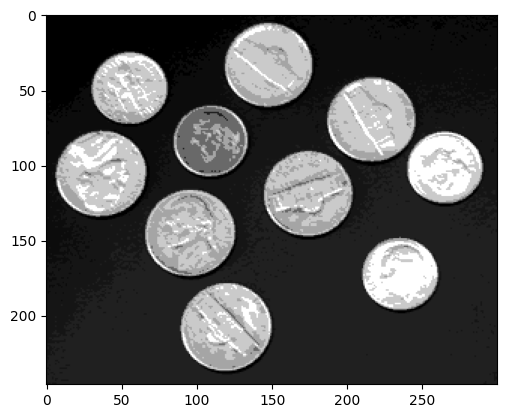

In [4]:
test = io.imread('Image/coins.pgm')
test = util.img_as_float(test)

plt.imshow(k_means(test,8),cmap='gray')
plt.show()

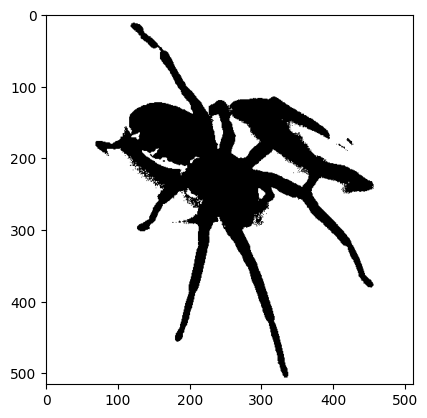

In [5]:
test = io.imread('Image/PetiteBete.pgm')
test = util.img_as_float(test)

plt.imshow(k_means(test,2),cmap='gray')
plt.show()

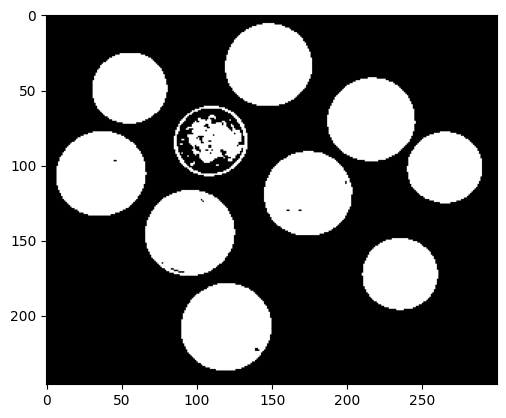

In [6]:
test = io.imread('Image/coins.pgm')
test = util.img_as_float(test)

plt.imshow(k_means(test,2),cmap='gray')
plt.show()